# Netlfix Movies Recommendation 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [3]:
df=pd.read_csv("./netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Cleaning

In [5]:
df["date_added"] = pd.to_datetime(df["date_added"], format="%B %d, %Y", errors='coerce')

In [6]:
df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.shape
df.duplicated().sum()

np.int64(0)

### Data Analysis

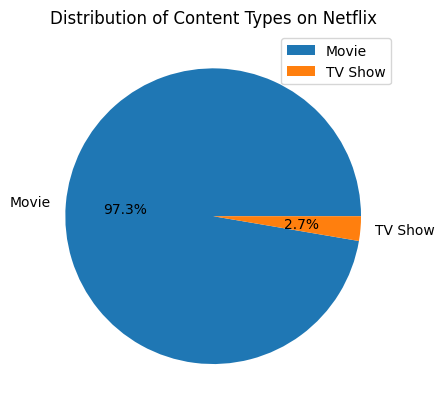

In [10]:
plt.pie(df["type"].value_counts(), labels=df["type"].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Content Types on Netflix')
plt.legend()
plt.show()

/var/folders/5x/341jy0k570z4tcfpp_0cb8jr0000gn/T/ipykernel_33421/2730318289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country", data=df[df['country'].isin(top_countries)], order=top_countries, palette='viridis')


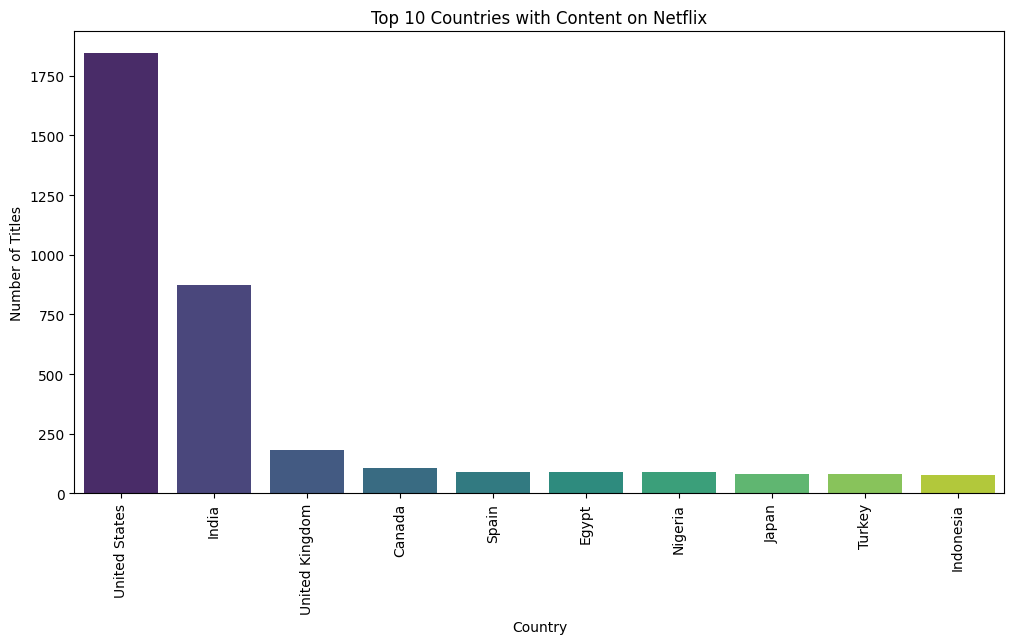

In [11]:
top_countries = df['country'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=df[df['country'].isin(top_countries)], order=top_countries, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

In [12]:
df["director"].unique()


array(['Haile Gerima', 'Andy Devonshire', 'Theodore Melfi', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [13]:
df["director"].value_counts().head(10)


director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: count, dtype: int64

In [14]:
group_by1=df.groupby("cast")["rating"].count().sort_values(ascending=False).head(10)
group_by1

cast
Samuel West           10
Jeff Dunham            7
Kevin Hart             6
Jim Gaffigan           5
Bill Burr              5
Vir Das                4
Tom Segura             4
Bill Hicks             4
Craig Sechler          4
David Attenborough     4
Name: rating, dtype: int64

/var/folders/5x/341jy0k570z4tcfpp_0cb8jr0000gn/T/ipykernel_33421/4234086208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index, palette='viridis')


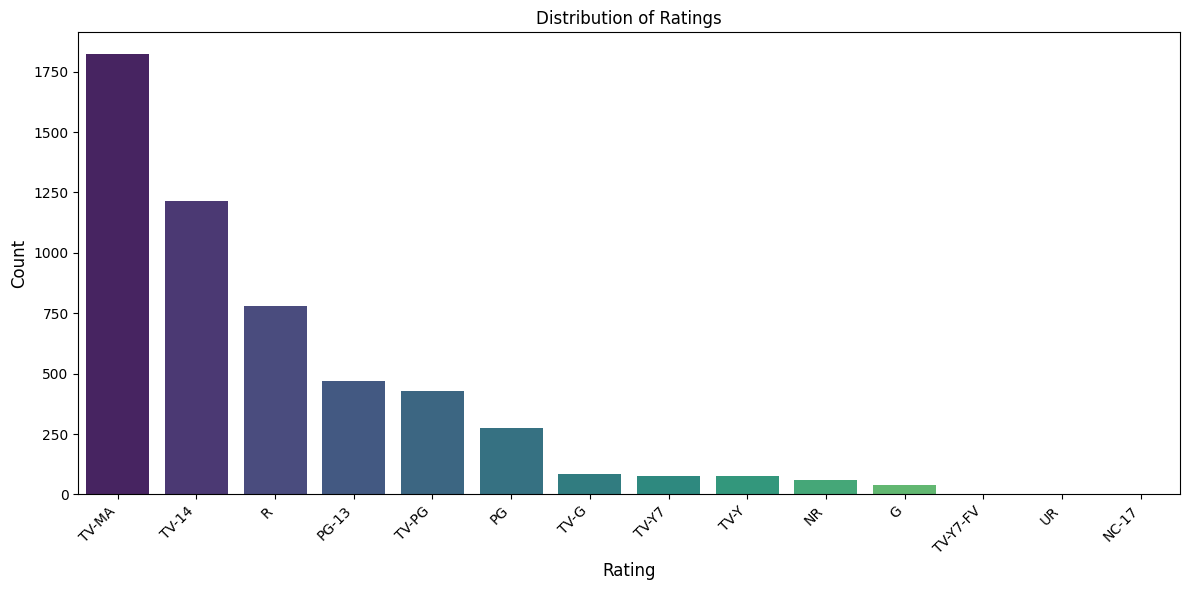

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
print(df["duration"].value_counts().head(10))
print()
print(df.columns)

duration
94 min     135
93 min     130
97 min     129
95 min     127
90 min     123
91 min     117
102 min    112
98 min     109
92 min     109
96 min     109
Name: count, dtype: int64

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


### Movie Recommendation System

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df['combined_features'] = df['cast'] + ' ' + df['director'] + ' ' + df['listed_in'] + ' ' + df['description']

In [23]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(df['combined_features'])

In [24]:
similarity_matrix = cosine_similarity(feature_vectors)

In [25]:
def recommend_movies(movie_title, num_recommendations=5):
    # Get the index of the movie
    movie_index = df[df['title'] == movie_title].index
    if movie_index.empty:
        return "Movie not found in the dataset."
    else:
        index = movie_index[0]
        # Get similarity scores for the movie
        similarity_scores = list(enumerate(similarity_matrix[index]))
        # Sort movies by similarity score in descending order
        sorted_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        # Return the top recommended movies (excluding the input movie)
        recommended_movies = [df['title'].iloc[i[0]] for i in sorted_movies[1:num_recommendations+1]]
        return recommended_movies


### Working recommendation model

In [34]:
movie = "Chennai Express"

recommendations = recommend_movies(movie)
print(recommendations)

['Rogue Warfare: The Hunt', 'Rogue Warfare', 'Set Up', 'Sword Masters: Two Champions of Shaolin', 'Skylines']


# Thank You